Registered cameras: ['qcmos', 'summer-ccd', 'winter']


[W astropy] Input data contains invalid values (NaNs or infs), which were automatically clipped.


Winter Focus images loaded: {'sa': [<imagedaemon.utils.image.Image object at 0x177c96c50>, <imagedaemon.utils.image.Image object at 0x177cf0050>, <imagedaemon.utils.image.Image object at 0x177d08050>, <imagedaemon.utils.image.Image object at 0x177d20050>, <imagedaemon.utils.image.Image object at 0x177d38fd0>, <imagedaemon.utils.image.Image object at 0x177d51050>], 'sb': [<imagedaemon.utils.image.Image object at 0x177cd9bd0>, <imagedaemon.utils.image.Image object at 0x177cf1010>, <imagedaemon.utils.image.Image object at 0x177d0c050>, <imagedaemon.utils.image.Image object at 0x177d24050>, <imagedaemon.utils.image.Image object at 0x13ff30150>, <imagedaemon.utils.image.Image object at 0x177d54050>], 'sc': [<imagedaemon.utils.image.Image object at 0x177cdc050>, <imagedaemon.utils.image.Image object at 0x177cf4050>, <imagedaemon.utils.image.Image object at 0x177d0cb90>, <imagedaemon.utils.image.Image object at 0x177d2c050>, <imagedaemon.utils.image.Image object at 0x177d44050>, <imagedaemon.

ValueError: The truth value of an array with more than one element is ambiguous. Use a.any() or a.all()

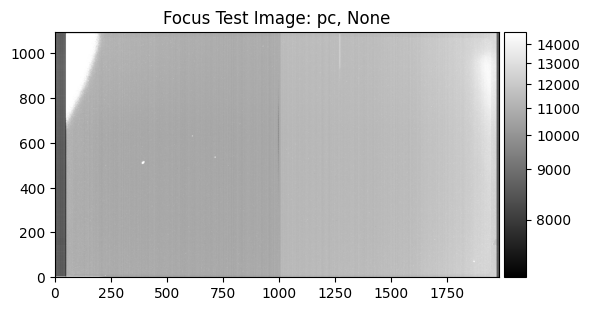

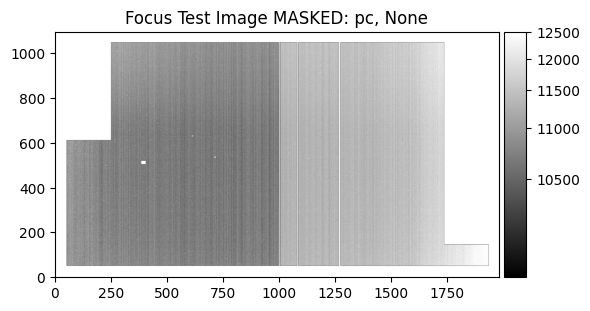

In [ ]:
import os
from glob import glob
import json
import numpy as np
from imagedaemon import registry
# let's try to run the winter calibration pipeline
from imagedaemon.utils.paths import RAW_DATA_DIR
from imagedaemon.utils.image import Image
from imagedaemon.utils.wcs_utils import pix2sky
from imagedaemon.utils.image import plot_image




available_cameras = registry.available()
print("Registered cameras:", available_cameras)

# winter focus loop

winter_focus_dir = os.path.join(RAW_DATA_DIR, "winter", "focus")
winter_focus_images = sorted(glob(os.path.join(winter_focus_dir, "*.fits")))
from imagedaemon.cameras.winter.winter_image import WinterImage

# plot one
img = WinterImage(winter_focus_images[0])
#img.plot_image(title = f"Focus Image: {img.filename}\nFocus Position: {img.top_level_header['FOCPOS']:.0f}",)
# calibrate all the focus images
winter = registry.get("winter")

# try to load the focus images
res = winter._load_focus_images(winter_focus_images)
print(f"Winter Focus images loaded: {res}")

# plot a focus image
addr = "pc"
ch_img = res[addr][0]
ch_img.plot_image(title = f"Focus Test Image: {addr}, {ch_img.filename}")

# plot the image with the mask
ch_img.plot_image(title = f"Focus Test Image MASKED: {addr}, {ch_img.filename}", apply_mask = True)

# save the mask image for debugging
ch_img.save_mask_image(os.path.join(os.getenv("HOME"), "data", "tmp", f"focus_test_mask_{addr}.fits"))

# save the test image for debugging
ch_img.save_image(os.path.join(os.getenv("HOME"), "data", "tmp", f"focus_test_{addr}.fits"))

winter_focus_calibrated = winter.calibrate_for_focus(
    image_paths = winter_focus_images,
    out_dir = os.path.join(os.getenv("HOME"), "data", "tmp"),
    addrs = ["pa", "pb", "pc"]
)

print(f"Winter Focus calibrated images: {winter_focus_calibrated}")

# run a focus loop
results = winter.run_focus_loop(image_list = winter_focus_images,
                                   addrs = ["pa", "pb", "pc"],
                                   output_dir = None,
                                   )
                                   
# plot the first one
#focus_calibrated[0].plot_image(f"First Focus Calibrated Image: {focus_calibrated[0].filename}",)
print(json.dumps(results, indent=4))

Mask shape: (1096, 1984)
mask is none? False


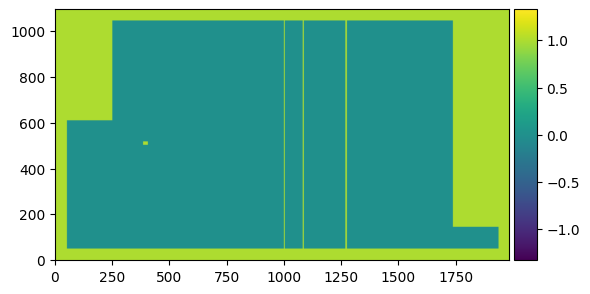

In [7]:
# shape of mask
print(f"Mask shape: {ch_img.mask.shape}")
plot_image(ch_img.mask)

print(f"mask is none? {ch_img.mask is None}")